<a href="https://colab.research.google.com/github/mbhuvans/dba-ml-assignment/blob/main/DBA_ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import OLSInfluence



In [25]:
df = pd.read_csv("/content/drive/MyDrive/DBA/ML_Assignment1/health_linear_regression_v2.csv")
df

,quarterly_fee_revenue_k,aum_millions,trades_per_quarter,discretionary_mandate,seg_HNW,seg_UHNW,seg_FamilyOffice,running_sequence
0,31.64,4.75,11,0,0,1,0,1
1,41.81,5.52,11,1,1,0,0,2
2,37.96,4.90,7,0,0,1,0,3
3,40.82,6.78,20,0,1,0,0,4
4,56.72,19.47,14,0,0,0,0,5
...,...,...,...,...,...,...,...,...
295,47.62,2.54,13,0,0,0,1,296
296,65.64,10.63,21,0,0,0,1,297
297,93.05,29.65,9,0,0,1,0,298
298,36.74,2.34,11,0,0,1,0,299


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   quarterly_fee_revenue_k  300 non-null    float64
 1   aum_millions             300 non-null    float64
 2   trades_per_quarter       300 non-null    int64  
 3   discretionary_mandate    300 non-null    int64  
 4   seg_HNW                  300 non-null    int64  
 5   seg_UHNW                 300 non-null    int64  
 6   seg_FamilyOffice         300 non-null    int64  
 7   running_sequence         300 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [27]:
df.describe()

,quarterly_fee_revenue_k,aum_millions,trades_per_quarter,discretionary_mandate,seg_HNW,seg_UHNW,seg_FamilyOffice,running_sequence
count,300.000000,300.000000,300.000000,300.000000,300.0000,300.000000,300.000000,300.000000
mean,45.582233,8.075733,14.056667,0.456667,0.3400,0.203333,0.086667,150.500000
std,16.708258,6.899968,3.794926,0.498951,0.4745,0.403151,0.281816,86.746758
min,12.220000,0.560000,5.000000,0.000000,0.0000,0.000000,0.000000,1.000000
25%,35.010000,3.430000,11.000000,0.000000,0.0000,0.000000,0.000000,75.750000
50%,43.045000,6.260000,14.000000,0.000000,0.0000,0.000000,0.000000,150.500000
75%,52.400000,10.197500,17.000000,1.000000,1.0000,0.000000,0.000000,225.250000
max,133.490000,47.940000,25.000000,1.000000,1.0000,1.000000,1.000000,300.000000


In [28]:
#numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = ['quarterly_fee_revenue_k','aum_millions','trades_per_quarter']

df.select_dtypes(include=[np.number]).columns.tolist()


['quarterly_fee_revenue_k',
 'aum_millions',
 'trades_per_quarter',
 'discretionary_mandate',
 'seg_HNW',
 'seg_UHNW',
 'seg_FamilyOffice',
 'running_sequence']

In [29]:
df[numeric_cols]

,quarterly_fee_revenue_k,aum_millions,trades_per_quarter
0,31.64,4.75,11
1,41.81,5.52,11
2,37.96,4.90,7
3,40.82,6.78,20
4,56.72,19.47,14
...,...,...,...
295,47.62,2.54,13
296,65.64,10.63,21
297,93.05,29.65,9
298,36.74,2.34,11


In [30]:
# Compute descriptive statistics
desc_stats = pd.DataFrame({
    "Median": df[numeric_cols].median(),
    "IQR": df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25),
    "Skewness": df[numeric_cols].skew(),
    "Kurtosis": df[numeric_cols].kurt()
})

desc_stats

,Median,IQR,Skewness,Kurtosis
quarterly_fee_revenue_k,43.045,17.3900,1.592477,4.498380
aum_millions,6.260,6.7675,2.215134,6.896071
trades_per_quarter,14.000,6.0000,0.185861,-0.525151


### Box Plots

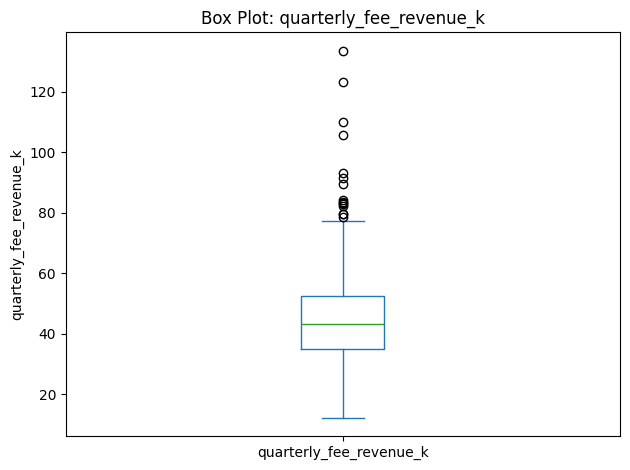

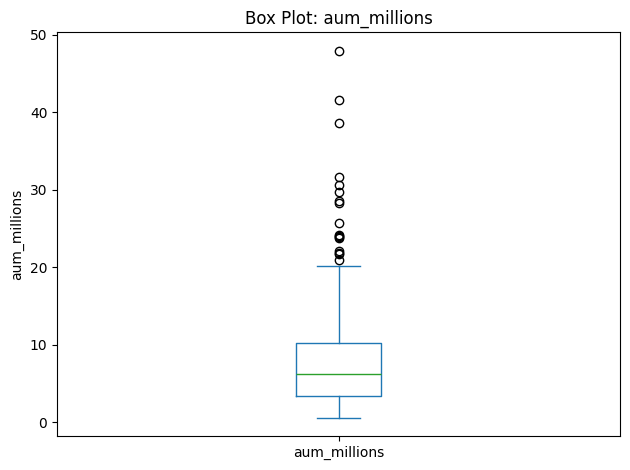

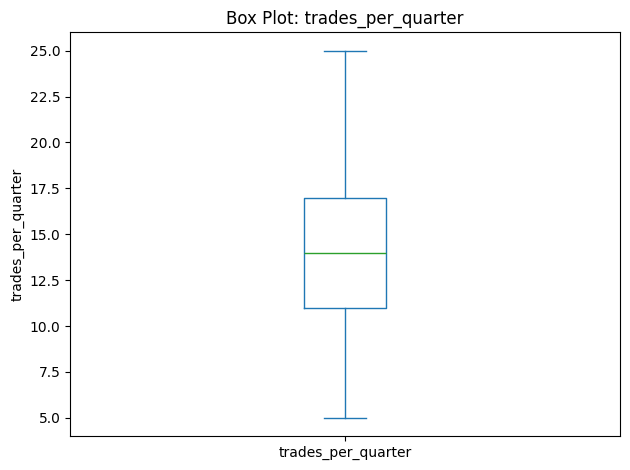

In [31]:
#numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = ['quarterly_fee_revenue_k','aum_millions','trades_per_quarter']
for col in numeric_cols:
    plt.figure()
    df[col].plot(kind="box")
    plt.title(f"Box Plot: {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [32]:
# Define dependent and independent variables based on the regression equation
X = df[['aum_millions', 'trades_per_quarter', 'discretionary_mandate',
        'seg_HNW', 'seg_UHNW', 'seg_FamilyOffice']]
y = df['quarterly_fee_revenue_k']

# Add constant and fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [33]:
# Extract fitted values and residuals
fitted_vals = model.fittedvalues
residuals = model.resid
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

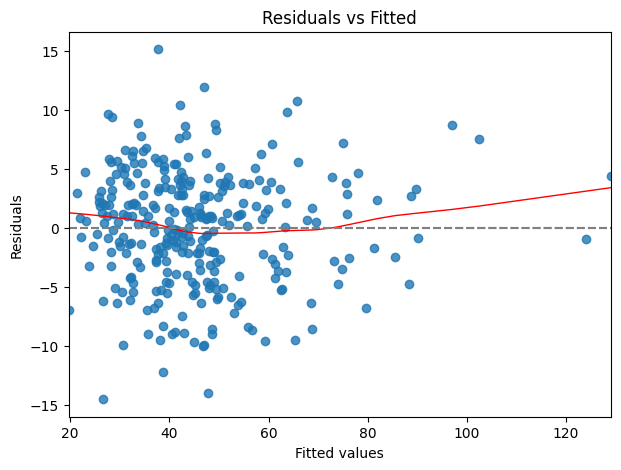

In [34]:
# --- Residuals vs Fitted Plot ---
plt.figure(figsize=(7,5))
sns.residplot(x=fitted_vals, y=y, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, linestyle='--', color='grey')
plt.show()

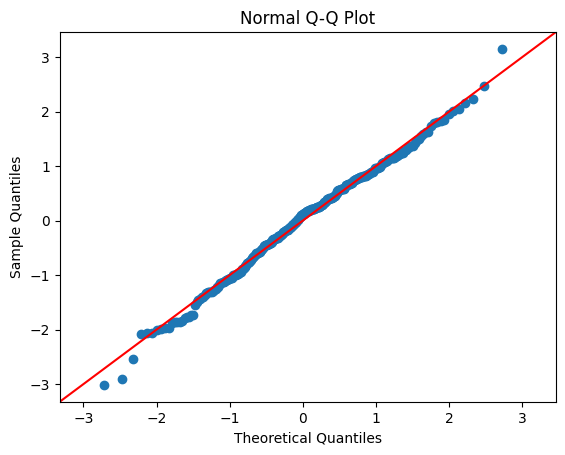

In [35]:
# --- QQ Plot (Normality of residuals) ---
sm.qqplot(residuals, line='45', fit=True)
plt.title("Normal Q-Q Plot")
plt.show()

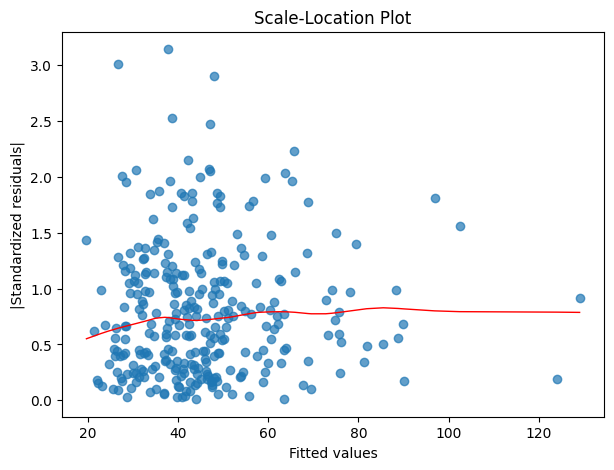

In [36]:
# --- Scale-Location Plot ---
plt.figure(figsize=(7,5))
plt.scatter(fitted_vals, abs(standardized_residuals), alpha=0.7)
sns.regplot(x=fitted_vals, y=abs(standardized_residuals), scatter=False, lowess=True, line_kws={'color':'red', 'lw':1})
plt.xlabel("Fitted values")
plt.ylabel("|Standardized residuals|")
plt.title("Scale-Location Plot")
plt.show()



In [37]:
# Compute influence metrics
influence = OLSInfluence(model)
cooks_d = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag
stud_resid = influence.resid_studentized_external

n = len(y)
p = X.shape[1]
cooks_thresh = 4 / n
lev_warn1 = 2 * p / n
lev_warn2 = 3 * p / n

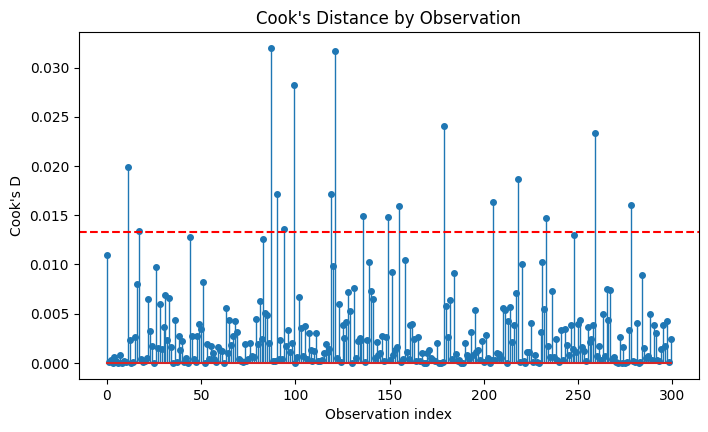

In [38]:
# --- 1) Cook's Distance Stem Plot ---
plt.figure(figsize=(8,4.5))
markerline, stemlines, baseline = plt.stem(np.arange(n), cooks_d)
plt.setp(markerline, markersize=4)
plt.setp(stemlines, linewidth=1)
plt.axhline(cooks_thresh, linestyle='--', color='red')
plt.title("Cook's Distance by Observation")
plt.xlabel("Observation index")
plt.ylabel("Cook's D")
plt.show()

Text(0, 0.5, 'Externally Studentized Residuals')

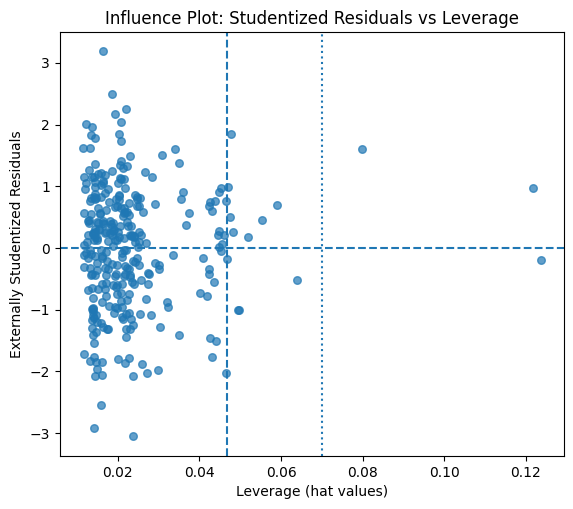

In [39]:
# --- 2) Influence Plot ---
plt.figure(figsize=(6.5,5.5))
plt.scatter(leverage, stud_resid, s=30, alpha=0.7)
plt.axhline(0, linestyle='--')
plt.axvline(lev_warn1, linestyle='--')
plt.axvline(lev_warn2, linestyle=':')
plt.title("Influence Plot: Studentized Residuals vs Leverage")
plt.xlabel("Leverage (hat values)")
plt.ylabel("Externally Studentized Residuals")

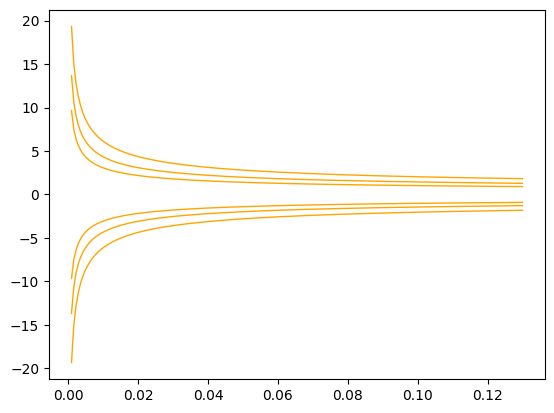

In [40]:
# Optional Cook’s D contours
lev_grid = np.linspace(0.001, min(0.99, max(leverage)*1.05), 200)
for D in [cooks_thresh, cooks_thresh*2, cooks_thresh*4]:
    t_curve = np.sqrt(np.maximum(D * p / (lev_grid * (1 - lev_grid)), 0))
    plt.plot(lev_grid,  t_curve, linewidth=1, color='orange')
    plt.plot(lev_grid, -t_curve, linewidth=1, color='orange')
plt.show()

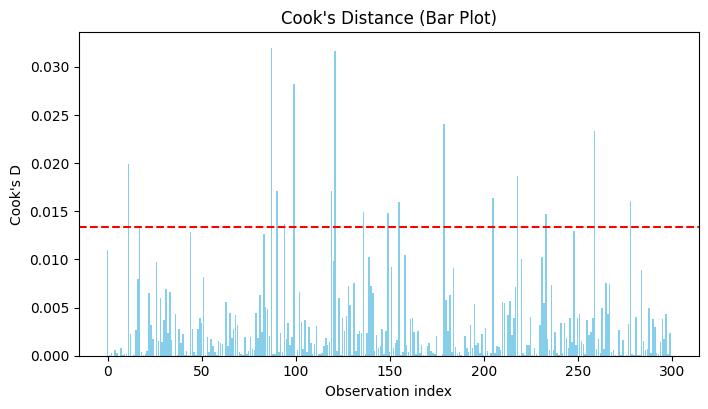

In [41]:
# --- 3) Bar Plot of Cook's Distance ---
plt.figure(figsize=(8,4.2))
plt.bar(np.arange(n), cooks_d, color='skyblue')
plt.axhline(cooks_thresh, linestyle='--', color='red')
plt.title("Cook's Distance (Bar Plot)")
plt.xlabel("Observation index")
plt.ylabel("Cook's D")
plt.show()

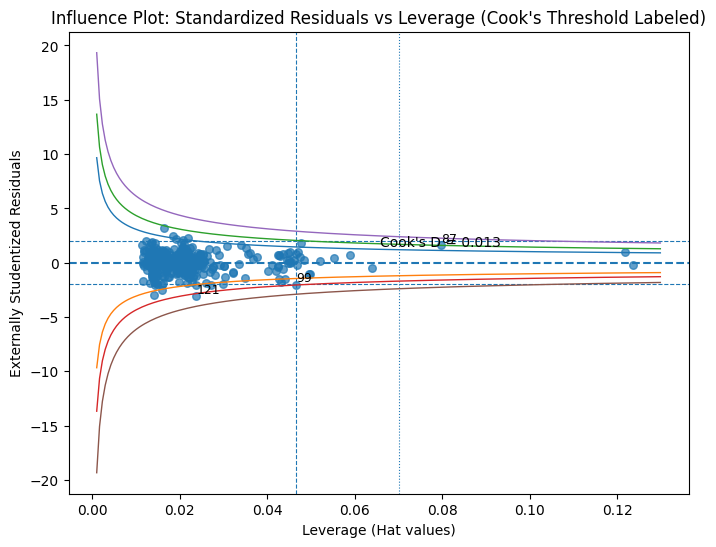

In [47]:
# Influence Plot: Standardized Residuals vs Leverage with Cook's D contours
plt.figure(figsize=(8,6))
plt.scatter(leverage, stud_resid, s=30, alpha=0.7)
plt.axhline(0, linestyle='--')
plt.axhline(2, linestyle='--', linewidth=0.8)
plt.axhline(-2, linestyle='--', linewidth=0.8)
plt.axvline(lev_warn1, linestyle='--', linewidth=0.8)
plt.axvline(lev_warn2, linestyle=':', linewidth=0.8)
plt.xlabel("Leverage (Hat values)")
plt.ylabel("Externally Studentized Residuals")
plt.title("Influence Plot: Standardized Residuals vs Leverage (Cook's Threshold Labeled)")

# Cook's D contours (includes threshold 4/n)
lev_grid = np.linspace(0.001, min(0.99, max(leverage)*1.05), 200)
for D in [cooks_thresh, 2*cooks_thresh, 4*cooks_thresh]:
    t_curve = np.sqrt(np.maximum(D * p / (lev_grid * (1 - lev_grid)), 0))
    plt.plot(lev_grid,  t_curve, linewidth=1)
    plt.plot(lev_grid, -t_curve, linewidth=1)

# Annotate Cook's threshold (4/n) on its contour at mid leverage
mid = len(lev_grid)//2
t_curve_thresh = np.sqrt(np.maximum(cooks_thresh * p / (lev_grid * (1 - lev_grid)), 0))
plt.text(lev_grid[mid], t_curve_thresh[mid], f"Cook's D = {cooks_thresh:.3f}", va='bottom', ha='left')

# Label top-3 most influential points by Cook's D
top3 = np.argsort(cooks_d)[-3:][::-1]
for i in top3:
    plt.text(leverage[i], stud_resid[i], f"{i}", fontsize=9, va='bottom', ha='left')

plt.show()